In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv
import seaborn as sns
import string

In [2]:
#Cleaning up dups from key field 'Make'
def func(x):
    punc = '''-!()[]{};:'",<>./?@#$%^&*~'''
    for ele in str(x):
        if ele in punc:
            x = str(x).replace(ele, "")
    x = str(x).title()
    x = x.replace(" Inc","")
    x = x.replace(" Corp","")
    x = x.replace(" Co","")
    x = x.replace("Airborne Windsports","Airborne_Windsports")
    x = x.replace("Airborne Windsport","Airborne_Windsports")
    x = x.replace("Airborne_Windsports Ltd","Airborne_Windsports")
    x = x.replace("Airborne_Windsports Pty Ltd","Airborne_Windsports")
    x = x.replace("Air Borne Windsports Pty Ltd","Airborne_Windsports")
    x = x.replace("Airbus Industrie","Airbus")
    x = x.replace("Airbuss","Airbus")
    x = x.replace("Boeingmpany","Boeing")
    x = x.replace("The Boeingmpany","Boeing")
    x = x.replace("The Boeing","Boeing")
    x = x.replace("Brantley","Brantly")
    x = x.replace("Mcdonnell Douglasoration","Mcdonnell_Douglas")
    x = x.replace("Mcdonald Douglas","Mcdonnell_Douglas")
    x = x.replace("Mcdonnell-Douglas","Mcdonnell_Douglas")
    x = x.replace("Mcdonnell Douglas Aircraft","Mcdonnell_Douglas")
    x = x.replace("Douglas","Mcdonnell_Douglas")
    x = x.replace("Mcdonnell Mcdonnell_Douglas","Mcdonnell_Douglas")
    x = x.replace("Saabscania","Saab_Scania")
    x = x.replace("Saab-Scania Ab Saab","Saab_Scania")
    x = x.replace("Saabscania Ab Saab","Saab_Scania")
    x = x.replace("Saab-Scania","Saab_Scania")
    x = x.replace("Saab_Scania Ab Saab","Saab_Scania")
    x = x.replace("Waco","Waco_Classic_Aircraft")
    x = x.replace("Classic Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Waco Classic Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Waco_Classic_Aircraft Waco_Classic_Aircraft","Waco_Classic_Aircraft")
    x = x.replace("Schweitzer","Schweizer")
    x = x.replace("Schewizer","Schweizer")
    x = x.replace("Pm Aviation Ltd","Pm Aviation")
    x = x.replace("Schleicher Alexander Gmbh ","Schleicher Alexander Gmbh")
       
    return x

In [3]:
df = pd.read_csv('AviationDataCleaned.csv',low_memory=False)
df['Make'] = df['Make'].apply(func)
df['Model'] = df['Model'].apply(func)
df['Make and Model']=df['Make and Model']= df['Make']+"-"+df['Model']
df['Weather.Condition'] = df['Weather.Condition'].fillna('UNK').apply(lambda x: str(x).upper())
df['Weather.Condition'].unique()

array(['UNK', 'IMC', 'VMC'], dtype=object)

In [4]:
major_index = df['Make'].value_counts(ascending=False)>100
major_index.index

Index(['Cessna', 'Piper', 'Beech', 'Bell', 'Boeing', 'Mooney', 'Robinson',
       'Grumman', 'Bellanca', 'Hughes',
       ...
       'Hebb', 'Aeros Ltdskyranger Aircraft', 'Sportavia Putzer',
       'Curtistravel Air', 'Scott Terry G', 'Zenith Aircraft', 'Indus',
       'Diamond Aircraft Industry', 'Hillertriplex Indinc',
       'Rotary Air Force Marketing'],
      dtype='object', length=1710)

In [5]:
make_list=list(df['Make'].unique())
make_list.sort()
print(make_list)

['1200', '177Mf Llc', '2000 Mccoy', '2021Fx3 Llc', '3Xtrim', '737', 'A Schleicher Gmbh ', 'Aaa Aircraft Leasing', 'Aaa Aircraft Llc', 'Ab Sportine Aviacija', 'Abc', 'Ac Mfg  Devt', 'Adams', 'Adams Balloon', 'Adams Balloons Llc', 'Adams Dennis Allen', 'Advanced Acft', 'Advanced Aviation', 'Advanced Technology', 'Adventura', 'Aerial Productions Intl', 'Aermacchi', 'Aero Adventure', 'Aero At Sp Zoo', 'Aero Bristell', 'Aero Design Eleven', 'Aero Eli Servizi', 'Aero Falcon Intl', 'Aero Mercantil Sa', 'Aero Sp Z O O', 'Aero Sp Z O O Gobosh', 'Aero Tek', 'Aero Vodochody', 'Aero Vodochody Aero Works', 'Aero Works', 'Aerodyne', 'Aerofab', 'Aerolite', 'Aerommander', 'Aeromot', 'Aeronca', 'Aeronca Aircraftoration', 'Aeronca Champ', 'Aeronca Champion', 'Aeroncabubeck', 'Aeroncabubeck Irving', 'Aeroprakt', 'Aeroprakt Manufacturing Sp Zoo', 'Aeropro Cz', 'Aeropro Cz S R O', 'Aeros', 'Aeros Ltd', 'Aeros Ltdskyranger Aircraft', 'Aerospace', 'Aerospace Tech Of Australia', 'Aerospatiale', 'Aerospatiale 

In [6]:
df.groupby('Make').mean()['Total_passengers'].sort_values(ascending=False).head(60)

Make
Tupolev                         169.666667
737                             164.500000
Ltv                             152.000000
Airbus                          144.761905
Ilyushin                        126.000000
Mcdonnelldouglas                125.333333
Mcdonnell_Mcdonnell_Douglas     121.750000
Boeing                          103.110126
Lockheed                         73.059322
Bacaerospatiale                  71.000000
Embraerempresa Brasileira De     70.500000
Mcdonnell_Douglas                70.278846
Fokker                           54.885246
Bac                              48.000000
British Aircraft Bac             47.000000
Bombardier                       45.956204
Embraer S A                      40.285714
Atr                              35.958333
Fairchild Dornier                35.333333
Nan                              35.080000
Embraer                          33.347418
Boeing Of Canadadehav Div        33.000000
Northrop                         31.500000
Embrae

In [7]:
major_index = df['Make'].value_counts(ascending=False)>10
major_makes_dict={'makes':list(major_index.index),'bools':list(major_index.values)}
major_makes = pd.DataFrame(major_makes_dict)


In [8]:
major_makes_list=major_makes.loc[major_makes['bools']==True,'makes']
major_makes_list

0                      Cessna
1                       Piper
2                       Beech
3                        Bell
4                      Boeing
                ...          
225                     Extra
226          Hispano Aviacion
227      Fairchild Swearingen
228                    Blanik
229    Mcdonnell_Douglas Heli
Name: makes, Length: 230, dtype: object

In [9]:
df_major=df[df['Make'].isin(major_makes_list)]

In [10]:
df[df['Make'].isin(major_makes_list)].shape

(76204, 27)

In [11]:
df_subset=df[df['Make'].isin(major_makes_list)]
df_subset_make_mean = df_subset.groupby('Make').mean().sort_values(by=['Minor/NonInj_Percentage'],axis=0,ascending=False)
safest_makes=list(df_subset_make_mean.head(15).index)
df_safest = df[df['Make'].isin(safest_makes)]

df_safest_makes=df_safest[df_safest['Weather.Condition'].isin(['IMC','VMC'])]
df_safest_makes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2512 entries, 49 to 79021
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               2512 non-null   int64  
 1   Investigation.Type       2512 non-null   object 
 2   Event.Date               2512 non-null   object 
 3   Location                 2509 non-null   object 
 4   Country                  2506 non-null   object 
 5   Injury.Severity          2512 non-null   object 
 6   Aircraft.damage          1848 non-null   object 
 7   Aircraft.Category        826 non-null    object 
 8   Make                     2512 non-null   object 
 9   Model                    2512 non-null   object 
 10  Amateur.Built            2507 non-null   object 
 11  Number.of.Engines        2346 non-null   float64
 12  Engine.Type              2334 non-null   object 
 13  Schedule                 1639 non-null   object 
 14  Total.Fatal.Injuries  

<AxesSubplot:>

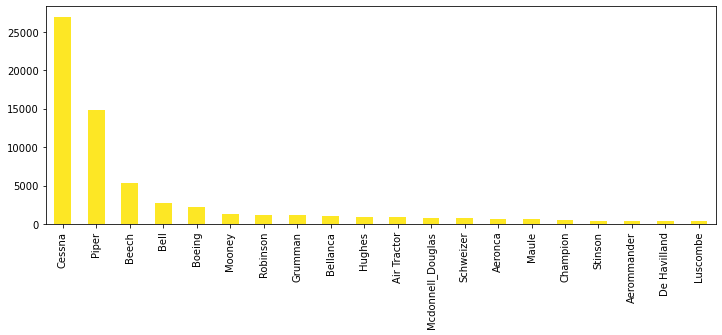

In [12]:
fig, ax = plt.subplots(figsize = (12,4))
df_major['Make'].value_counts().head(20).plot.bar(ax=ax,colormap='viridis_r')

In [13]:
list(safest_makes)

['American Legend Aircraft',
 'Saab_Scania',
 'Howard Aircraft',
 'Bombardier',
 'Snow',
 'Airbus',
 'Boeing',
 'Waco_Classic_Aircraft',
 'Ultramagic',
 'Grummanschweizer',
 'Fokker',
 'Dassaultbreguet',
 'Cub Crafters',
 'Evektoraerotechnik As',
 'Helio']

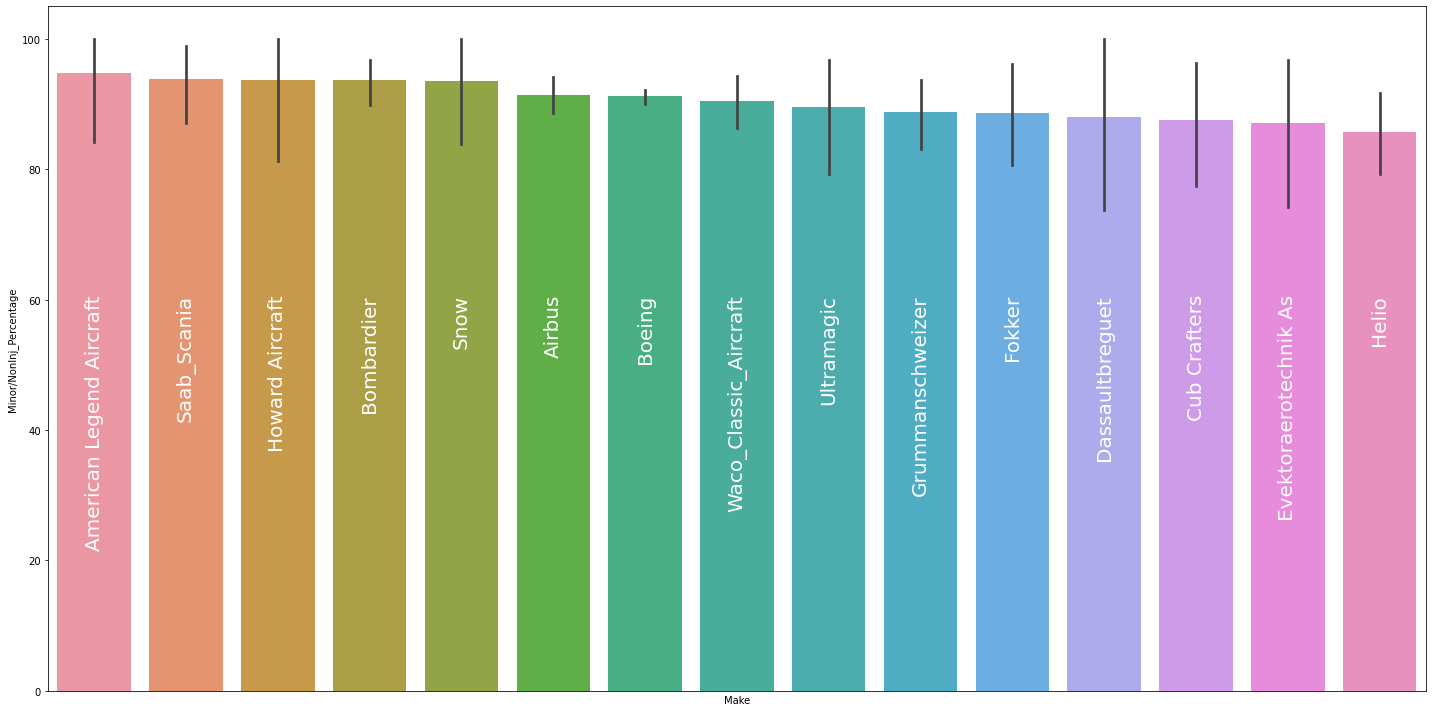

In [14]:
fig, ax = plt.subplots(figsize = (20,10))
sns.barplot(x='Make',y='Minor/NonInj_Percentage',data=df_safest,order=list(safest_makes))
ax.tick_params(axis = 'x', rotation = 90, pad = -400, labelsize=20,colors='white')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Make', ylabel='Minor/NonInj_Percentage'>

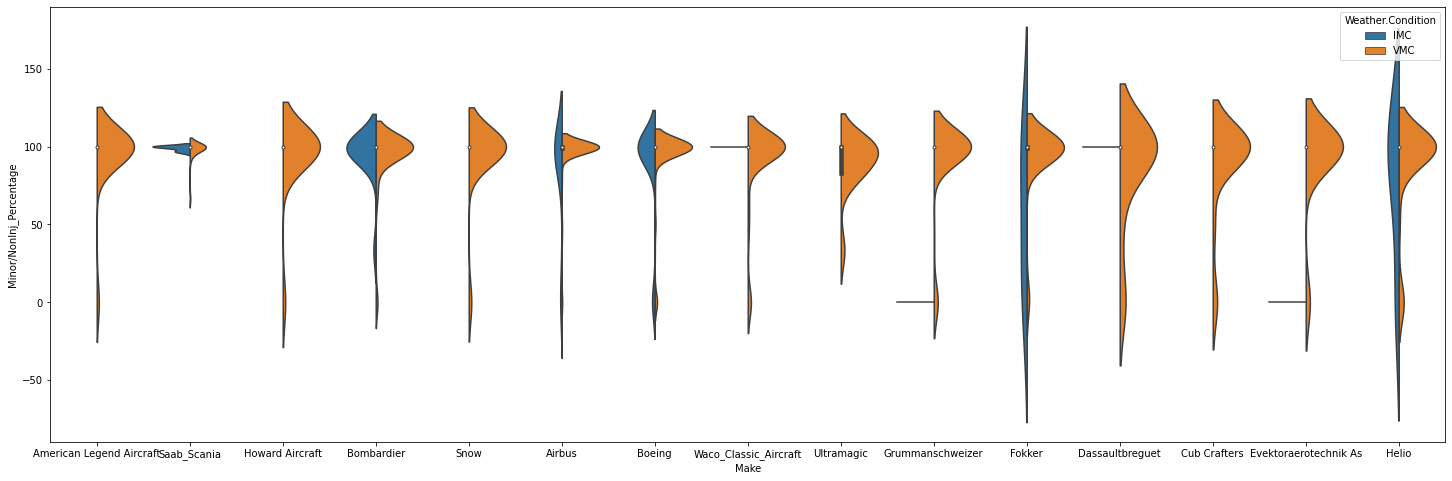

In [15]:
fig, ax = plt.subplots(figsize = (25,8))
sns.violinplot(x='Make',y='Minor/NonInj_Percentage',data = df_safest_makes,order=list(safest_makes),hue='Weather.Condition',split = True)

In [16]:
recommended_makes=['Bombardier','Saab_Scania','Boeing']
len(df[df['Make'].isin(recommended_makes)])

2324

In [17]:
df_subset_makenmodel_mean = df[df['Make'].isin(recommended_makes)].groupby('Make and Model').mean()
df_subset_makenmodel_mean


,Unnamed: 0,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total_passengers,Fatality_Pecentage,Serious_Inj_Percentage,Minor/NonInj_Percentage
Make and Model,,,,,,,,,,,
Boeing-1942,63287.0,1.0,0.0,0.0,0.0,1.0,2007.0,1.0,0.0,0.000000,100.000000
Boeing-234,42965.0,NaN,2.0,0.0,0.0,0.0,1997.0,2.0,100.0,0.000000,0.000000
Boeing-369D,47968.0,1.0,0.0,1.0,0.0,0.0,2000.0,1.0,0.0,100.000000,0.000000
Boeing-369E,46244.5,1.0,0.0,0.0,0.0,1.5,1998.5,1.5,0.0,0.000000,100.000000
Boeing-707,47692.8,4.0,34.6,0.4,0.0,1.4,2000.0,36.4,58.4,1.600000,40.000000
...,...,...,...,...,...,...,...,...,...,...,...
Saab_Scania-Saab 340B,60658.6,2.0,0.0,0.2,0.2,25.2,2006.0,25.6,0.0,0.645161,99.354839
Saab_Scania-Sf340A,37880.5,2.0,0.0,0.0,0.0,18.5,1995.0,18.5,0.0,0.000000,100.000000
Saab_Scania-Sf340B,47918.6,2.0,0.0,0.6,0.0,19.0,1999.6,19.6,0.0,8.032407,91.967593


In [18]:
df_recommended_makemodels=df_subset_makenmodel_mean[df_subset_makenmodel_mean['Minor/NonInj_Percentage']==100]
recommended_makenmodels=list(df_recommended_makemodels[df_recommended_makemodels['Total_passengers']>10].index)
recommended_makenmodels

['Boeing-707123B',
 'Boeing-707355C',
 'Boeing-717 200',
 'Boeing-717231',
 'Boeing-720025',
 'Boeing-727023',
 'Boeing-727200A',
 'Boeing-727200B',
 'Boeing-72721',
 'Boeing-727214A',
 'Boeing-72722',
 'Boeing-727223B',
 'Boeing-72722C',
 'Boeing-72723',
 'Boeing-727231A',
 'Boeing-727233',
 'Boeing-727247',
 'Boeing-72725',
 'Boeing-727254',
 'Boeing-727257',
 'Boeing-727276',
 'Boeing-727290',
 'Boeing-7272M7',
 'Boeing-7272Q8',
 'Boeing-72731',
 'Boeing-72731H',
 'Boeing-72735',
 'Boeing-72751',
 'Boeing-72790C',
 'Boeing-737  3L9',
 'Boeing-737  4D7',
 'Boeing-737  53C',
 'Boeing-737  6Ct',
 'Boeing-737  800',
 'Boeing-737  8As',
 'Boeing-737  8K2',
 'Boeing-737  932Er',
 'Boeing-737 3H4',
 'Boeing-737 500',
 'Boeing-737 724',
 'Boeing-737 76N',
 'Boeing-737 76Q',
 'Boeing-737 7L9',
 'Boeing-737 800',
 'Boeing-737 832',
 'Boeing-737 924',
 'Boeing-737130',
 'Boeing-737200A',
 'Boeing-737200C',
 'Boeing-737200Rs',
 'Boeing-737205',
 'Boeing-737209',
 'Boeing-737217',
 'Boeing-73724

In [19]:
df_recommended_makes=df[df['Make'].isin(recommended_makes)]
df_recommended_makenmodels=df[df['Make and Model'].isin(recommended_makenmodels)]

In [20]:
df[df['Make']=='Evektor-Aerotechnik As']['Total_passengers'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Total_passengers, dtype: float64

In [21]:
df_recommended_makenmodels.to_csv('AviationDataCleaned_RecommendedModel.csv')
df_recommended_makes.to_csv('AviationDataCleaned_RecommendedMakes.csv')